# ✌🏻✊🏻🖐🏻 인공지능과 가위바위보 하기

## 1. 데이터 준비!

In [8]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [9]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


### 1-2. 데이터 크기 변경

In [10]:
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path2)

print("주먹 이미지 resize 완료!")

100  images to be resized.
100  images resized.
주먹 이미지 resize 완료!


In [11]:
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")



100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 1-3. 데이터 라벨 생성 및 전처리(정규화)

In [12]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


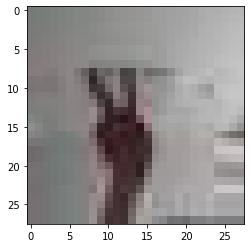

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 2. 딥러닝 네트워크 설계

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_train_norm.shape)

(300, 28, 28, 3)
(300,)
(300, 28, 28, 3)


### 2-2. 네트워크 학습 시키기

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 6s 246ms/step - loss: 1.1078 - accuracy: 0.3713
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0475 - accuracy: 0.5433
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9754 - accuracy: 0.6227
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8600 - accuracy: 0.8161
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.7680
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.9085
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.9260
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.9365
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.9346
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9803


## 3. 네트워크 test 해보기

### 3-1. test 데이터 생성 및 크기 변경

In [17]:
image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
resize_images(image_dir_path4)

print("테스트 이미지 resize 완료!")

300  images to be resized.
300  images resized.
테스트 이미지 resize 완료!


In [18]:
image_dir_path4 

'/aiffel/aiffel/rock_scissor_paper/test'

### 3-2. test 데이터 라벨 생성 및 전처리(정규화)

In [19]:
import numpy as np

def load_data2(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+ '/rock_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data2(image_dir_path4)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 3-3. test 데이터를 predict 해보기

In [20]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.2595 - accuracy: 0.3333
test_loss: 3.2594995498657227 
test_accuracy: 0.3333333432674408


> <span style="color:red"> ※ 인식률이 생각보다 너무 낮음. </span>

## 4. 더 좋은 네트워크 만들어보기

### 4-1. 개선 방법 제시
>     - 하이퍼 파라미터값 변경.
>     - 학습 데이터 갯수 늘림.
>     - 오버 피팅 방지

### 4-2. 하이퍼 파라미터값 변경.

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(516, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 7s 382ms/step - loss: 1.1026 - accuracy: 0.3544
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 1.0734 - accuracy: 0.4090
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.8734 - accuracy: 0.7884
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6133 - accuracy: 0.7033
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3182 - accuracy: 0.9800
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2477 - accuracy: 0.8864
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0646 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0280 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 1.0000


In [23]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 6.9043 - accuracy: 0.4167
test_loss: 6.904300212860107 
test_accuracy: 0.4166666567325592


### <span style="color:red"> ※ 큰 변화는 없다. </span>

### 4-3. 학습 데이터 갯수 확장 + 오버피팅 방지

In [24]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/rock"
resize_images(image_dir_path2)
print("주먹 이미지 resize 완료!")

image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/paper"
resize_images(image_dir_path3)
print("보 이미지 resize 완료!")

1650  images to be resized.
1650  images resized.
가위 이미지 resize 완료!
1650  images to be resized.
1650  images resized.
주먹 이미지 resize 완료!
1650  images to be resized.
1650  images resized.
보 이미지 resize 완료!


In [25]:
def load_data3(img_path, number_of_data=4950):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new_train_data"
(x_train, y_train)=load_data3(image_dir_path4)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3600 입니다.
x_train shape: (4950, 28, 28, 3)
y_train shape: (4950,)


In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)        

In [37]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)


Epoch 1/20
155/155 [==============================] - 1s 4ms/step - loss: 0.9334 - accuracy: 0.5116
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 0.8079 - accuracy: 0.5014
Epoch 3/20
155/155 [==============================] - 1s 4ms/step - loss: 0.7625 - accuracy: 0.5814
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 0.5482 - accuracy: 0.7367
Epoch 5/20
155/155 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.8252
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 0.3237 - accuracy: 0.8732
Epoch 7/20
155/155 [==============================] - 1s 4ms/step - loss: 0.2625 - accuracy: 0.8956
Epoch 8/20
155/155 [==============================] - 1s 4ms/step - loss: 0.1992 - accuracy: 0.9221
Epoch 9/20
155/155 [==============================] - 1s 4ms/step - loss: 0.1880 - accuracy: 0.9338
Epoch 10/20
155/155 [==============================] - 1s 4ms/step - loss: 0.1633 - accuracy: 0.9342

In [38]:
import numpy as np

def load_data3(img_path, number_of_data=1650):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+ '/rock_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path5 = os.getenv("HOME") + "/aiffel/rock_scissor_paper_2/test"
(x_test, y_test)=load_data3(image_dir_path5)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 1650 입니다.
x_test shape: (1650, 28, 28, 3)
y_test shape: (1650,)


In [39]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

52/52 - 0s - loss: 1.3019 - accuracy: 0.8030
test_loss: 1.3018699884414673 
test_accuracy: 0.8030303120613098


### <span style="color:red"> ※ 최종 인식률 : 0.803 </span>
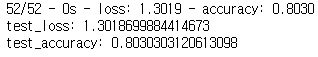

# 💡 회고

> #### - 학습 데이터가 많을수록 인식률이 올라감.
> #### - 입력되는 데이터마다 특징이 다름.
> #### - 하이퍼 파라미터 값을 잘 맞춰야함.
> #### - 오버팅을 방지하기 위해서 Dropout 레이어를 추가함.